In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
matches = pd.read_csv(r"C:/Users/user/Desktop/Fifa-Project/Fifa_World_Cup_Data/WorldCupMatches.csv")
players = pd.read_csv(r"C:/Users/user/Desktop/Fifa-Project/Fifa_World_Cup_Data/WorldCupPlayers.csv")
worldCup = pd.read_csv(r"C:/Users/user/Desktop/Fifa-Project/Fifa_World_Cup_Data/WorldCups.csv")
display(matches.head(3), players.head(3), worldCup.head(3))



,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


Text(0.5, 1.0, 'Attendence in every World Cup Year')

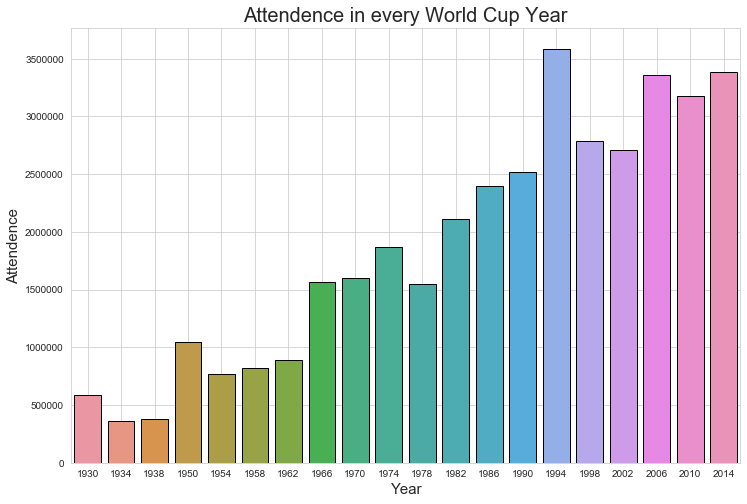

In [11]:
matches.isnull().sum()
sns.set_style("whitegrid")

matches = matches.drop_duplicates(subset ='MatchID', keep = 'first')
matches = matches[matches["Year"].notnull()]
att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"]=att["Year"].astype(int)
plt.figure(figsize = (12,8))
sns.barplot(att["Year"], att["Attendance"], linewidth = 1, edgecolor = "k"*len(att))
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Attendence", fontsize = 15)
plt.grid(True)
plt.title("Attendence in every World Cup Year", fontsize = 20)

Text(0.5, 1.0, 'Average Attendance in every World Cup Year')

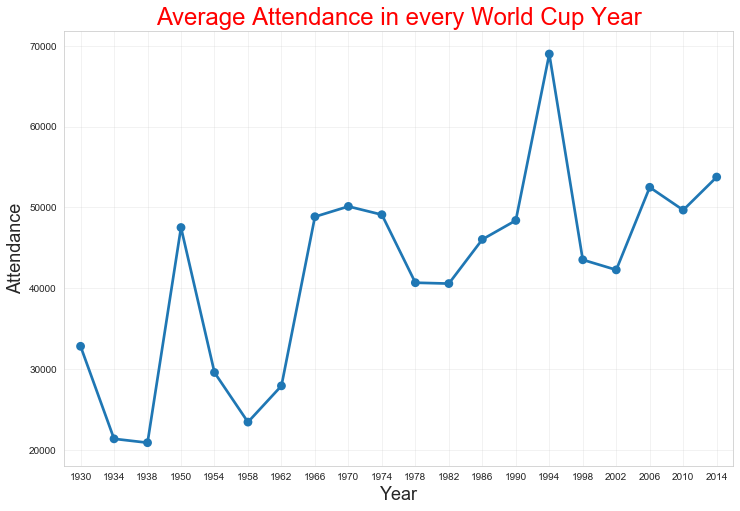

In [22]:
att1= matches.groupby("Year")["Attendance"].mean().reset_index()
att1["Year"] = att1["Year"].astype(int)

plt.figure(figsize = (12,8))
sns.pointplot(att1["Year"], att1["Attendance"])
plt.grid(True, alpha=.3)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Attendance", fontsize = 18)
plt.title("Average Attendance in every World Cup Year", fontsize = 24, color='r')

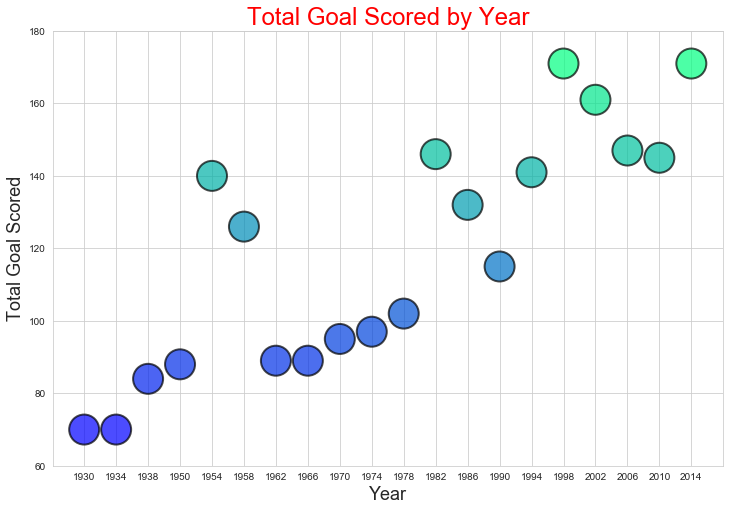

In [65]:
plt.figure(figsize=(12,8))
worldCup["Year1"]=worldCup["Year"].astype(str)

c=worldCup["GoalsScored"]
cmap = plt.cm.get_cmap("winter")
ax = plt.scatter("Year1", "GoalsScored",data=worldCup,c=c,cmap=cmap,s=900,alpha=.7,linewidth=2,edgecolor="k")
plt.xticks(worldCup["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.xlabel("Year", fontsize=18)
plt.ylabel("Total Goal Scored",fontsize=18)
plt.title("Total Goal Scored by Year",fontsize=24,color='r')
plt.show()